# Figure 1 

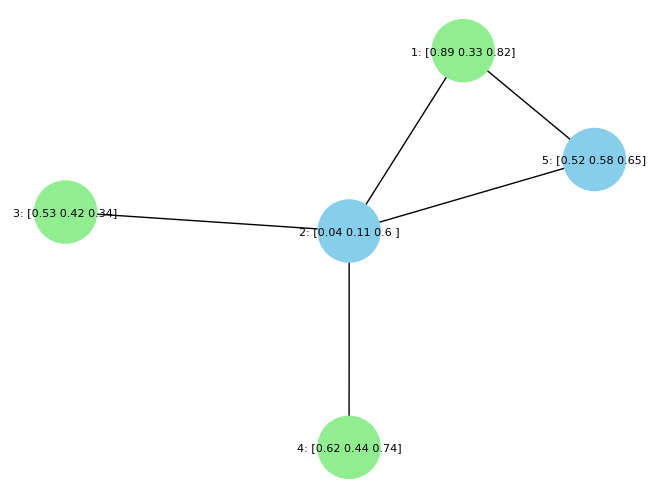

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(6)
G = nx.erdos_renyi_graph(n=5, p=0.5, seed=12)

for node in G.nodes():
    G.nodes[node]['attr'] = np.round(np.random.rand(3),2) # Vector of 3 random attributes


labels = {node: f"{node+1}: {G.nodes[node]['attr']}" for node in G.nodes()}
colors = np.random.choice(['skyblue', 'lightgreen'], size=5)

pos = nx.spring_layout(G, seed=12)
nx.draw(G, pos, with_labels=False, node_color=colors, node_size=2000, font_size=10)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)
plt.show()


# Figure 2 

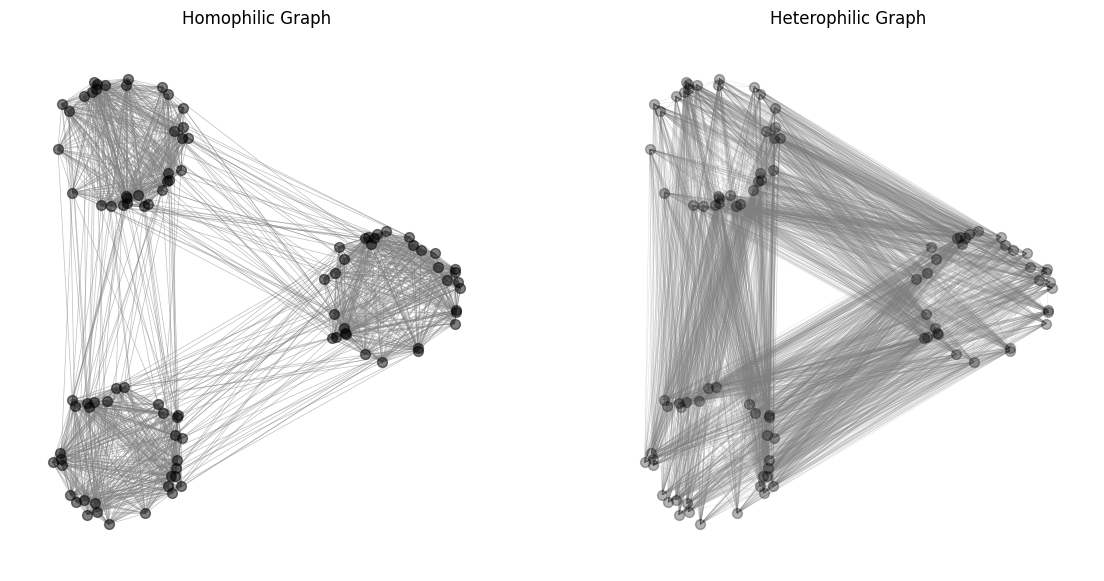

In [66]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

n = 99  
k = 3   
nodes_per_community = n // k

positions = {
    i: (np.cos(2 * np.pi * i / k), np.sin(2 * np.pi * i / k))
    for i in range(k)
}

node_community = {}
for i in range(k):
    for j in range(nodes_per_community):
        node_community[i * nodes_per_community + j] = i

pos = {}
for node, community in node_community.items():
    angle = 2 * np.pi * np.random.rand()  # random angle for within-community variation
    radius = 0.1 * np.random.rand() + 0.3 # random radius for spacing within community
    pos[node] = (positions[community][0] + radius * np.cos(angle),
                 positions[community][1] + radius * np.sin(angle))


G_homophilic = nx.Graph()
for node in range(n):
    G_homophilic.add_node(node)
    for neighbor in range(node + 1, n):
        if node_community[node] == node_community[neighbor]:
            # Higher probability of connecting within the same community
            if np.random.rand() < 0.9:
                G_homophilic.add_edge(node, neighbor)
        else:
            # Lower probability of connecting between communities
            if np.random.rand() < 0.05:
                G_homophilic.add_edge(node, neighbor)


G_heterophilic = nx.Graph()
for node in range(n):
    G_heterophilic.add_node(node)
    for neighbor in range(node + 1, n):
        if node_community[node] != node_community[neighbor]:
            # Higher probability of connecting between communities
            if np.random.rand() < 0.9:
                G_heterophilic.add_edge(node, neighbor)
        else:
            # Lower probability of connecting within the same community
            if np.random.rand() < 0.1:
                G_heterophilic.add_edge(node, neighbor)


fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Homophilic graph
nx.draw(G_homophilic, pos, ax=axs[0], node_size=50, node_color="black", edge_color='gray', width=.5, alpha=.5)
axs[0].set_title('Homophilic Graph')


# Heterophilic graph
nx.draw(G_heterophilic, pos, ax=axs[1], node_size=50, node_color="black", edge_color='gray', width=.3, alpha=.3)
axs[1].set_title('Heterophilic Graph')

plt.show()

In [1]:
from ParametricGraphModels.ADC_SBM import ADC_SBM, from_config
from config import Scenarios 
from graspy.simulations import sbm
import networkx as nx

In [ ]:
n = 3
B1 = np.full((n, n), 0.05) + np.diag([0.5 - 0.05] * n)
B2 = np.full((n, n), 0.18) + np.diag([0.5 - 0.18] * n)

# Generate SBM graphs
sbm_graph1 = sbm([100, 100, 100], B1, loops=False)
sbm_graph2 = sbm([100, 100, 100], B2, loops=False)

# Plot both graphs side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


nx.draw(nx.from_numpy_array(sbm_graph1), 
        ax=axes[0], node_size=10, alpha=0.1, node_color="black", edge_color='gray', width=.5)
axes[0].set_title('Tri: 0.05 – Diag: 0.5')


nx.draw(nx.from_numpy_array(sbm_graph2), 
        ax=axes[1], node_size=10, alpha=0.1, node_color="black", edge_color='gray', width=.5)
axes[1].set_title('Tri: 0.18 – Diag: 0.5')

plt.show()

In [ ]:
g2 = from_config(Scenarios.illustrative_2, 26)
l2, x2, y2 = *g2.reduce_dim_x(), g2.y

g3 = from_config(Scenarios.illustrative_3, 26)
l3, x3 = g3.reduce_dim_x()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first scatter plot
scatter1 = axes[0].scatter(x2[:, 0], x2[:, 1], c=l2, cmap='viridis', s=10, edgecolor=None)
axes[0].set_title('Ratio: 6/5')

# Plot the second scatter plot
scatter2 = axes[1].scatter(x3[:, 0], x3[:, 1], c=l3, cmap='viridis', s=10, edgecolor=None)
axes[1].set_title('Ratio: 6/1')

# Show the plots
plt.tight_layout()
plt.show()

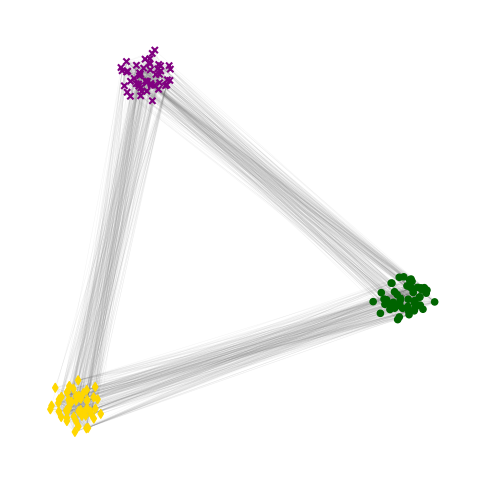

     0    1    2
0  622  256  254
1  256  626  273
2  254  273  632
     Y~F  Y~C  F~C
NMI  1.0  1.0  1.0
CV   1.0  1.0  1.0
ARI  1.0  1.0  1.0
Community
0    0.0
1    0.0
2    0.0
dtype: float64
Feat.Cluster
0    0.0
1    0.0
2    0.0
dtype: float64


In [11]:
params = Scenarios.illustrative_1
graph = from_config(params)
graph.rich_plot_graph(fig_size=(6,6))
print(graph.target_edge_counter())
print(graph.label_correlation())
print(graph.purity(fig_size=(6,6), group_by="Community", metric= "gini", plot_it=False))
print(graph.purity(fig_size=(6,6), group_by="Feat.Cluster", metric= "gini", plot_it=False))

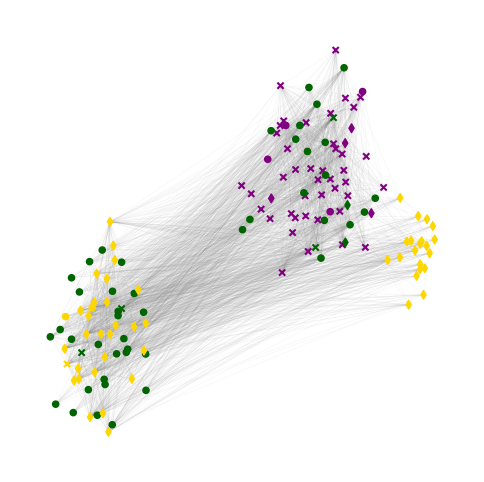

     0    1    2
0  537  395  369
1  395  457  338
2  369  338  567
          Y~F       Y~C       F~C
NMI  0.338691  0.617236  0.518951
CV   0.557779  0.831085  0.643650
ARI  0.265814  0.687397  0.400675
Community
0    0.2816
1    0.2176
2    0.1144
dtype: float64
Feat.Cluster
0    0.515918
1    0.545000
2    0.000000
dtype: float64


In [12]:
params = Scenarios.illustrative_2
graph = from_config(params)
graph.rich_plot_graph(fig_size=(6,6))
print(graph.target_edge_counter())
print(graph.label_correlation())
print(graph.purity(fig_size=(6,6), group_by="Community", metric= "gini", plot_it=False))
print(graph.purity(fig_size=(6,6), group_by="Feat.Cluster", metric= "gini", plot_it=False))

In [ ]:
params = Scenarios.illustrative_4
graph = from_config(params)
graph.rich_plot_graph(fig_size=(6,6))
print(graph.target_edge_counter())
print(graph.label_correlation())
print(graph.purity(fig_size=(6,6), group_by="Community", metric= "gini", plot_it=False))
print(graph.purity(fig_size=(6,6), group_by="Feat.Cluster", metric= "gini", plot_it=False))

In [ ]:
params = Scenarios.illustrative_6
graph = from_config(params)
graph.rich_plot_graph(fig_size=(6,6))
print(graph.target_edge_counter())
print(graph.label_correlation())
print(graph.purity(fig_size=(6,6), group_by="Community", metric= "gini", plot_it=False))
print(graph.purity(fig_size=(6,6), group_by="Feat.Cluster", metric= "gini", plot_it=False))